<a href="https://colab.research.google.com/github/ItzelPF/Visualizacion_Datos/blob/main/NetFlix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install pandas matplotlib seaborn plotly
#!pip install --upgrade pandas seaborn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/ItzelPF/Visualizacion_Datos/refs/heads/main/NetFlix.csv', sep = ',' )

In [8]:
print(df['date_added'].head())

0    14-Aug-20
1    15-Dec-17
2     5-Jan-19
3     1-Mar-16
4     3-Dec-18
Name: date_added, dtype: object


In [9]:
#Intentamos covertir directamente, capturando errores
try:
    df['date_added'] = pd.to_datetime(df['date_added'])
except ValueError:
  # Si falla, intentamos con un formato especifico
    df['date_added'] = pd.to_datetime(df['date_added'], format='%B %d, %Y', errors='coerce')

<ipython-input-9-8a3d65db10ff>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date_added'] = pd.to_datetime(df['date_added'])


In [10]:
print(df['date_added'].dtype)

datetime64[ns]


In [11]:
#Mostrar las primeras filas para verificar la coversión
print(df['date_added'].head())

#Si hay valores NaT (Not a time) despues de la coversión, los podemos identificar así:
print(df['date_added'].isna().sum())

0   2020-08-14
1   2017-12-15
2   2019-01-05
3   2016-03-01
4   2018-12-03
Name: date_added, dtype: datetime64[ns]
10


In [12]:
#Definir un diccionario de mapeo de ratings a valores numericos
rating_map = {
    'G': 1,
    'PG': 2,
    'PG-13': 3,
    'R': 4,
    'NC-17': 5,
    'TV-Y': 1,
    'TV-Y7': 2,
    'TV-G': 1,
    'TV-PG': 2,
    'TV-14': 3,
    'TV-MA': 4
}

In [13]:
#Crear una nueva columna rating numeric con valores covertidos
df['rating_numeric']= df['rating'].map(rating_map)

In [14]:
#Crear una nueva columna rating numeric con valores covertidos
df['rating_numeric']= df['rating'].map(rating_map).fillna(0)

#Mostrar las primeras filas para verificar la conversión
print(df[['rating','rating_numeric']].head())

#Obtener estadisticas bascias de la nueva columna numerica
print(df['rating_numeric'].describe())

  rating  rating_numeric
0  TV-MA             4.0
1  TV-MA             4.0
2  TV-PG             2.0
3      R             4.0
4   TV-G             1.0
count    7787.000000
mean        3.112752
std         0.996720
min         0.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: rating_numeric, dtype: float64


In [ ]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description,rating_numeric
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,4.0
1,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,2017-12-15,2008,TV-MA,143,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...,4.0


In [ ]:
df.dtypes

,0
show_id,object
type,object
title,object
director,object
cast,object
country,object
date_added,datetime64[ns]
release_year,int64
rating,object
duration,int64


In [15]:
#PARA VARIABLES NUMERICAS
numeric_columns = ['release_year','duration','rating_numeric']
print("Estadisticas descriptivas para variables numericas")
print(df[numeric_columns].describe())

Estadisticas descriptivas para variables numericas
       release_year     duration  rating_numeric
count   7787.000000  7787.000000     7787.000000
mean    2013.932580    69.122769        3.112752
std        8.757395    50.950743        0.996720
min     1925.000000     1.000000        0.000000
25%     2013.000000     2.000000        3.000000
50%     2017.000000    88.000000        3.000000
75%     2018.000000   106.000000        4.000000
max     2021.000000   312.000000        5.000000


De 3 variables que son el año de lanzamiento, la duración y la calificación se obtienen algunas estadísticas, todas tienen un conteo de 7787


*   El año de lanzamiento tiene un promedio de 2013.93, lo que quiere decir que en el 2013-2014 es cuando hay más lanzamientos de películas. Se tiene una desviación estándar de 8.75. El año de lanzamiento más antiguo fue en 1925 y el más reciente en 2021.
*   La duración promedio de las películas se ecnuentran en 69.12, con una desviación estándar de 50.95 (demasiado dispersas), lo menor que dura una película o serie es 1 y el mayor es 312
* El promedio de las calificaciones de las películas o series es de 3.11, con muy poca desviación estándar ya que es de 0.996. La calificación menor fue de o y la mayor de 5



# **Medidad de tendencia central**

In [16]:
print("\Medidas de tendencia central para variables numericas: ")
for column in numeric_columns:
    print(f"\n{column}:")
    print(f"Media: {df[column].mean():.2f}")
    print(f"Mediana: {df[column].median():.2f}")
    print(f"Moda: {df[column].mode().values[0]:.2f}")

\Medidas de tendencia central para variables numericas: 

release_year:
Media: 2013.93
Mediana: 2017.00
Moda: 2018.00

duration:
Media: 69.12
Mediana: 88.00
Moda: 1.00

rating_numeric:
Media: 3.11
Mediana: 3.00
Moda: 4.00




*   En el año de lanzamiento encontramos un promedio de 2013, el año que más se repite es 2018 y el año medio es 2017
*   La duración promedio de las películas es de 69 minutos, la moda es 1 minuto, mientras que la duración mediana es de 88 minutos
* La calificación promedio es de 3.11, la mediana es 3 y la calificación que más se repide es 4



In [17]:
categorical_columns = ['type','rating','genres']
print("\n Estadisticas para variables categoricas")
for column in categorical_columns:
    print(f"\n{column}:")
    print(df[column].value_counts())
    print(f"Moda: {df[column].mode().values[0]}")


 Estadisticas para variables categoricas

type:
type
Movie      5377
TV Show    2410
Name: count, dtype: int64
Moda: Movie

rating:
rating
TV-MA       2863
TV-14       1931
TV-PG        806
R            665
PG-13        386
TV-Y         280
TV-Y7        271
PG           247
TV-G         194
NR            84
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: count, dtype: int64
Moda: TV-MA

genres:
genres
Documentaries                                                      334
Stand-Up Comedy                                                    321
Dramas, International Movies                                       320
Comedies, Dramas, International Movies                             243
Dramas, Independent Movies, International Movies                   215
                                                                  ... 
British TV Shows, Docuseries, TV Comedies                            1
Horror Movies, International Movies, Sci-Fi & Fantasy                1




*   De los tipos 5377 registros corresponden a películas y 2410 corresponden a series, osea que la moda serían las películas.
*   La calificacion más comun TV-MA aparece 2863 , seguido de TV-14 con 1931 veces, la frecuencia más baja es NC-17 con 3 veces y UR 5 veces
* EL genero más frecuente fue los documentales (334), pero hay varios generos que solo aparecen una vez como British TV Shows, Docuseries, TV Comedies,
Horror Movies, etc.


In [18]:
#Estadisticas para la columna de fecha
print("\nEstadisticas para la columna de fecha")
print(f"Fecha minima: {df['date_added'].min()}")
print(f"Fecha maxima: {df['date_added'].max()}")
print(f"Rango de fechas: {df['date_added'].max()- df['date_added'].min()}")


Estadisticas para la columna de fecha
Fecha minima: 2008-01-01 00:00:00
Fecha maxima: 2021-01-16 00:00:00
Rango de fechas: 4764 days 00:00:00


Esto nos muestra las fecha mínima y máxima y la diferencia o rango entre las fechas

In [19]:
#Conteo de valores unicos para otras columnas de objeto
object_columns = ['show_id', 'title', 'director', 'cast', 'country', 'description']
print("\nConteo de valores unicos para otras columnas de objeto")
for column in object_columns:
    print(f"\n{column}: {df[column].nunique()} valores unicos")


Conteo de valores unicos para otras columnas de objeto

show_id: 7787 valores unicos

title: 7787 valores unicos

director: 4049 valores unicos

cast: 6831 valores unicos

country: 681 valores unicos

description: 7769 valores unicos


In [ ]:
df.describe()

,date_added,release_year,duration,rating_numeric
count,7777,7787.000000,7787.000000,7787.000000
mean,2019-01-02 19:20:57.708627712,2013.932580,69.122769,3.112752
min,2008-01-01 00:00:00,1925.000000,1.000000,0.000000
25%,2018-02-01 00:00:00,2013.000000,2.000000,3.000000
50%,2019-03-08 00:00:00,2017.000000,88.000000,3.000000
75%,2020-01-20 00:00:00,2018.000000,106.000000,4.000000
max,2021-01-16 00:00:00,2021.000000,312.000000,5.000000
std,NaN,8.757395,50.950743,0.996720


*   Para cada variable se observa que hay un conteo de 7787 a excepción de date_added que tiene solo 7777
*  El año promedio de lanzamiento es aprox 2013.93, para la duración es 69.12 minutos. El promedio de la calificación (rating_numeric) es 3.11.
* El menor año de lanzamiento es 1925, la menor duración es de 1 minuto, y hay una calificación de 0.
* El año más reciente de lanzamiento fue 2021, la mayor duración es de 312 minutos, y la calificación máxima es 5.
* La desviación estándar muestra cuánto varían los datos respecto al promedio. En el año de lanzamiento es de 8.76 años, para la duración es de 50.95 minutos, un valor significativo. mientras que la calificacion varia poco solo 0.99



In [ ]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description,rating_numeric
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,4.0
1,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,2017-12-15,2008,TV-MA,143,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...,4.0


In [ ]:
# NO CORRRERLO
# Manejo de datos faltantes y duplicados
df.dropna(subset=['director'], inplace=True)
df.drop_duplicates(inplace=True)

# **Graficos**

## Histograma de año de lanzamiento

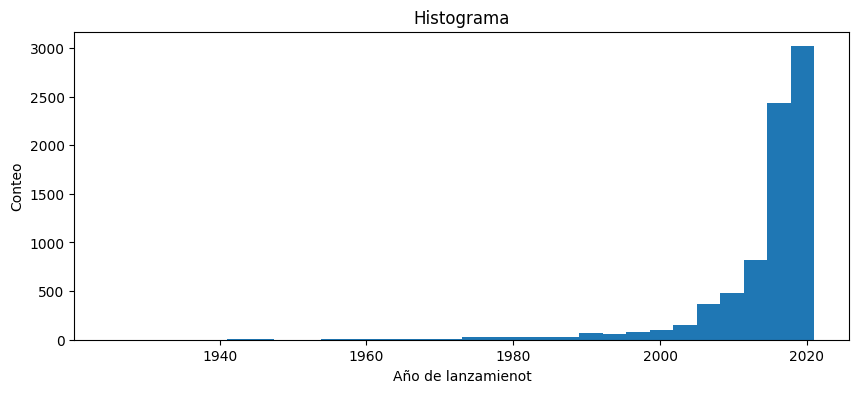

In [ ]:
datos= df.release_year

plt.figure(figsize=(10,4))
plt.hist(datos,bins=30)
plt.title('Histograma')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Frecuencia')
plt.show()

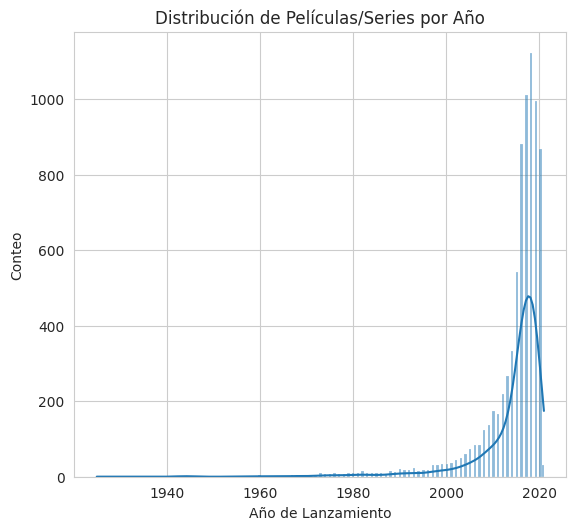

In [ ]:
plt.figure(figsize=(16, 10))
sns.set_style("whitegrid")

plt.subplot(2, 3, 1)
sns.histplot(df['release_year'], kde=True)
plt.title('Distribución de Películas/Series por Año')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Conteo')
plt.tight_layout()
plt.show()

Se observa como apartir del año 2000 en lo adelante hubo un gran crecimiento en el número de películas que se lanzaron, también que aprox en 2010 hasta el 2020 ha habido un pequeño descremento en los lanzamientos

## Histograma de duración


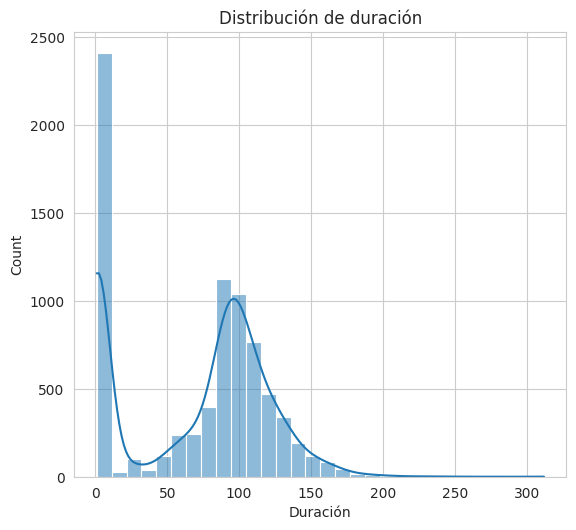

In [6]:
plt.figure(figsize=(16, 10))
sns.set_style("whitegrid")

plt.subplot(2, 3, 1)
sns.histplot(df['duration'], kde=True)
plt.title('Distribución de duración')
plt.xlabel('Duración')

plt.tight_layout()
plt.show()

Se observa que aproximadamente las películas tienen una duración de 90 y 100, aunque hay una gran cantidad que se encuentran en duración de entre 0 y 10.

## Gráfico de barras

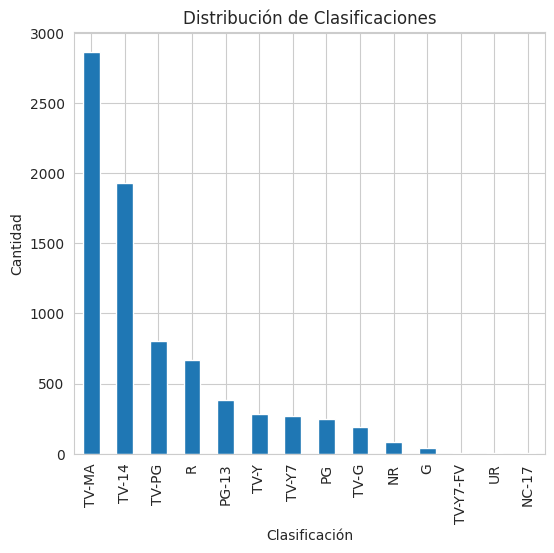

In [20]:
plt.figure(figsize=(16, 10))
sns.set_style("whitegrid")
plt.subplot(2, 3, 3)
df['rating'].value_counts().plot(kind='bar')
plt.title('Distribución de Clasificaciones')
plt.xlabel('Clasificación')
plt.ylabel('Cantidad')


plt.tight_layout()
plt.show()

La clasificación TV-MA y TV-14 tienen una mayor cantidad de películas/series, mientras que las otras se observa como se van disminuyendo poco a poco hasta llegar a TV-Y7-FV, UR y NC-17 donde no tenemos ninguna pelíucla/serie

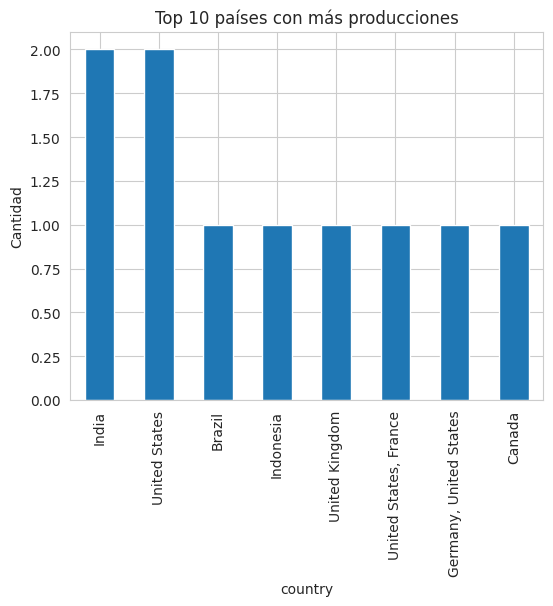

In [30]:
#Incorrecto
top10 = df['country'][:10]

plt.figure(figsize=(16, 10))
sns.set_style("whitegrid")
plt.subplot(2, 3, 3)
top10.value_counts().plot(kind='bar')
plt.title('Top 10 países con más producciones')

plt.ylabel('Cantidad')
plt.tight_layout()
plt.show()

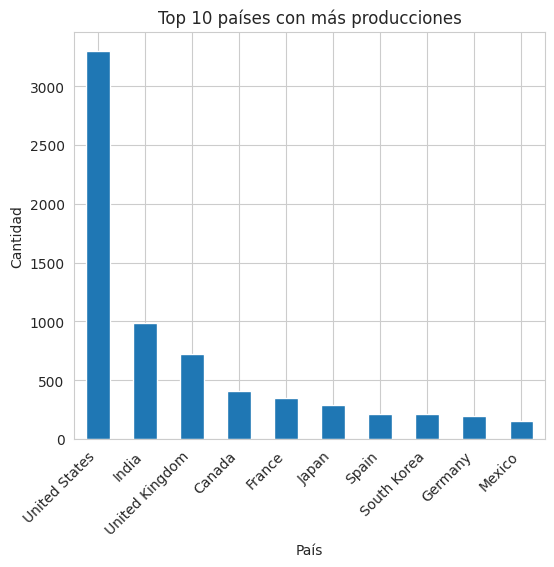

In [31]:
plt.figure(figsize=(16, 10))
sns.set_style("whitegrid")
plt.subplot(2, 3, 6)
df['country'].str.split(', ', expand=True).stack().value_counts().head(10).plot(kind='bar')
plt.title('Top 10 países con más producciones')
plt.xlabel('País')
plt.ylabel('Cantidad')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

Se observan los 10 países con mayor produción de películas o seríes, el que tiene mayor producción es Estados Unidos con más de 3000 (una gran diferenica a comparación de los siguientes 9 países), y el menor de los 10 es México con menos de 250.

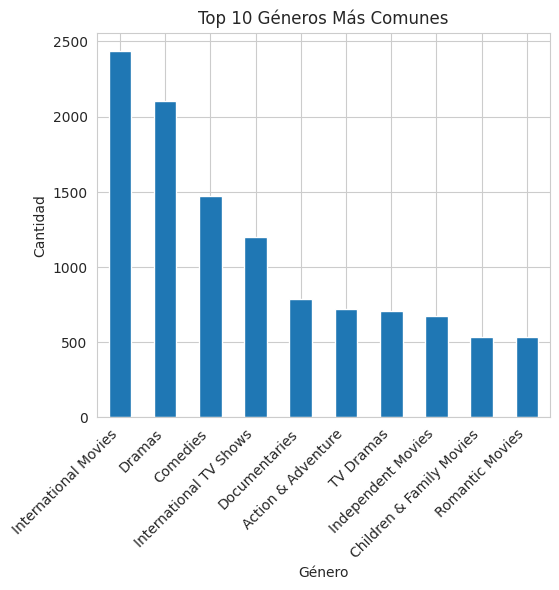

In [27]:
plt.figure(figsize=(16, 10))
sns.set_style("whitegrid")
plt.subplot(2, 3, 6)
df['genres'].str.split(', ', expand=True).stack().value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Géneros Más Comunes')
plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

Con este gráfico se muestran los 10 géneros con mayor cantidad, de esos 10 el primero es International Movies con aprox casi 2500, mientras que Romantic Movies es la quie tiene menor cantidad con un poco más de 500

## Gráfica de pastel


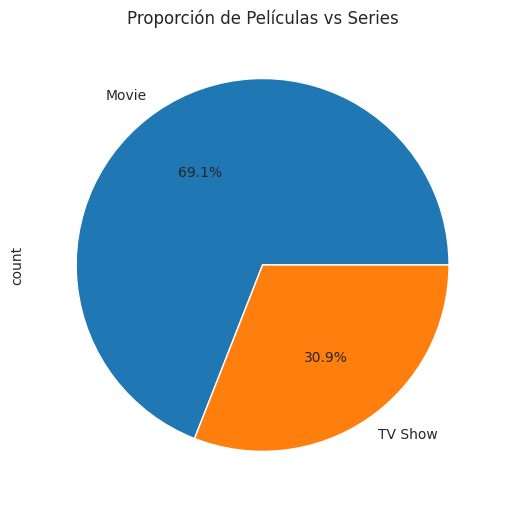

In [21]:
plt.figure(figsize=(16, 10))
sns.set_style("whitegrid")
plt.subplot(2, 3, 4)
df['type'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Proporción de Películas vs Series')


plt.tight_layout()
plt.show()

Se puede observar que hay una gran diferencia entre el número de peliculas y el número de series que hay, dandonos cuenta que hay muchas más películas con un 69.1% a comparación de las series que son solo el 30.9%